In [19]:
% matplotlib notebook
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

In [5]:
j = complex(0,1)

In [6]:
def cft(k1, k2, nonfour):
    """Numerically evaluate the Fourier Transform of g for the given frequencies"""    
    result = np.zeros((len(k1), len(k2)), dtype=complex)
    
    # Loop over all frequencies and calculate integral value
    for i, kk1 in enumerate(k1):
        for l, kk2 in enumerate(k2):
            # Evaluate the Fourier Integral for a single frequency ff, 
            # assuming the function is time-limited to abs(t)<5
            result[i][l] = complex_quadrature(lambda x, y: g(x, y)*np.exp(-j*kk1*x)*np.exp(-j*kk2*y), -xmax, xmax, -ymax, ymax)
    return (1/(2*np.pi))*result

def complex_quadrature(func, x1, x2, y1, y2, **kwargs):
    def real_func(x,y):
        return sp.real(func(x,y))
    def imag_func(x,y):
        return sp.imag(func(x,y))
    real_integral = integrate.dblquad(real_func, x1, x2, lambda x: y1, lambda x: y2)
    imag_integral = integrate.dblquad(imag_func, x1, x2, lambda x: y1, lambda x: y2)
    return (real_integral[0] + 1j*imag_integral[0])
    

In [7]:
def one(x,y):
    return 1.0

In [39]:
g = lambda x, y: np.exp(-((x)**2+(y)**2))

xmax = 10
dx = 0.01
x=np.arange(-xmax,xmax,dx)
ymax = 10
dy = 0.01
y=np.arange(-ymax,ymax,dy)

X, Y = np.meshgrid(x,y)

nonfour = g(X,Y)

<IPython.core.display.Javascript object>


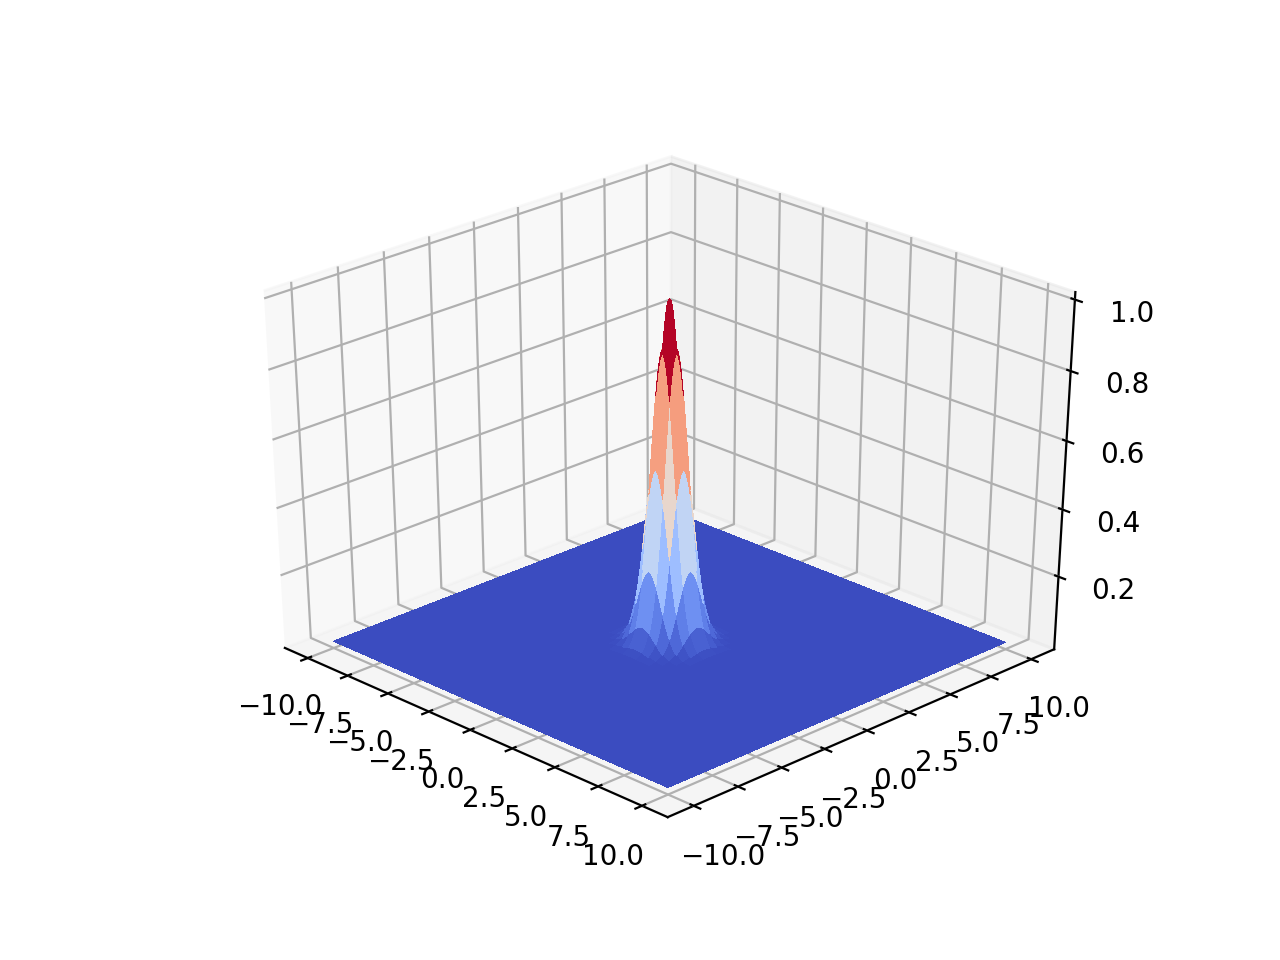

In [40]:
fig = plt.figure()
X, Y = np.meshgrid(x,y)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, nonfour , cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

<IPython.core.display.Javascript object>


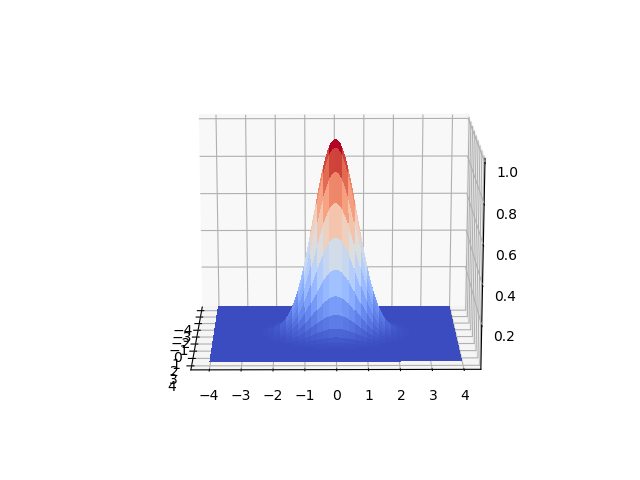

In [12]:
fig = plt.figure()
X, Y = np.meshgrid(x,y)
nonfour= g(X,Y)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, np.abs(nonfour) , cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [8]:
fig = plt.figure()
plt.imshow(nonfour, cmap='gray')

<IPython.core.display.Javascript object>

In [9]:
fig, ax = plt.subplots()
ax.imshow(np.abs(four), cmap='gray')

<IPython.core.display.Javascript object>

In [10]:
ax.cm

AttributeError: 'AxesSubplot' object has no attribute 'cm'

In [58]:
start = time.time()

a = sum(sum(nonfour*np.exp(-X)*np.exp(-Y)))
end = time.time()
print(end - start)

0.0961909294128418


In [27]:
a

(-3585.8898357723565-121.08839924933075j)